## Principal Component Analysis (Linear Dimensionality Reduction)

In [2]:
from sklearn.decomposition import PCA

In [3]:
# Preparing npy file
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-17 14:31:09--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-17 14:31:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-17 14:31:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [4]:
# Load data from file
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # 10,000 components

pca = PCA(n_components=50) # Default: n_components=None (all components are kept)
pca.fit(fruits_2d) # UNSUPERVISED - no target given

# Print num of principal axes in feature space (directions of maximum variance in the data)
# The components are already sorted by explained_variance_
print(pca.components_.shape)

(50, 10000)


In [5]:
# function for drawing from image array
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1): #ratio for figsize
    n = len(arr)
    rows = int(np.ceil(n/10)) # draw 10 images per line
    cols = n if rows < 2 else 10 # draw only n images if n < 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

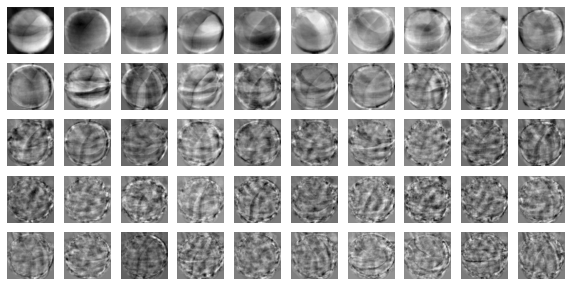

In [ ]:
# Draw principal components
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
# Dimenstionality reduction
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 10,000 to 50

(300, 10000)
(300, 50)


(300, 10000)


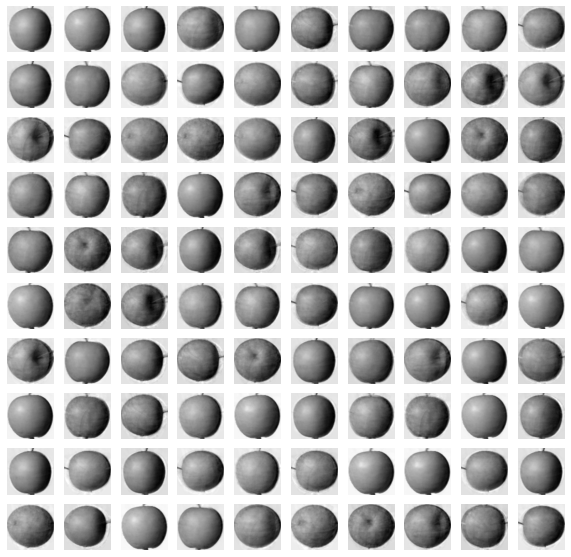

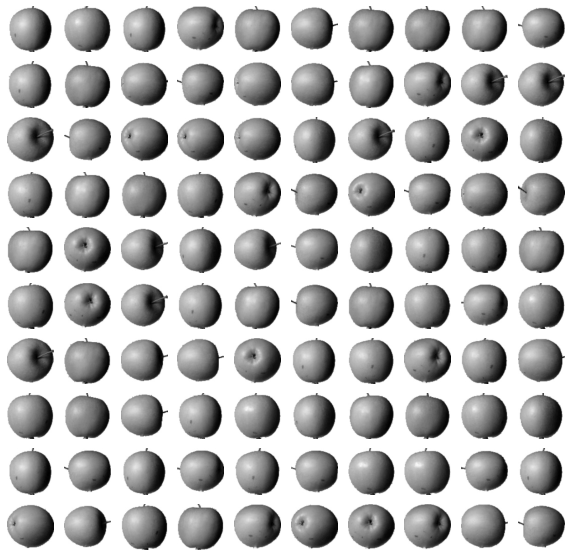

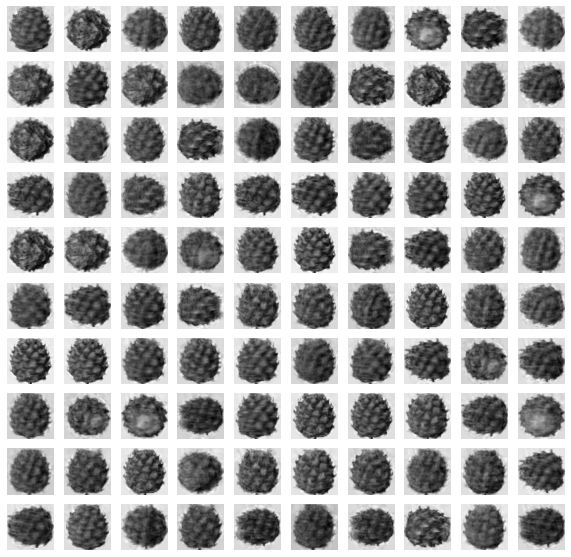

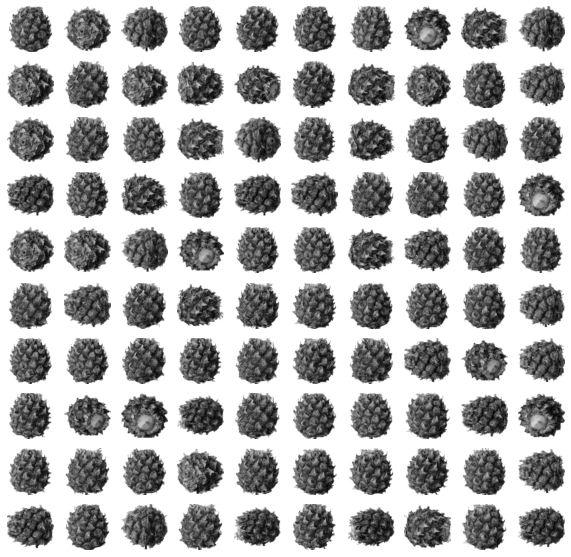

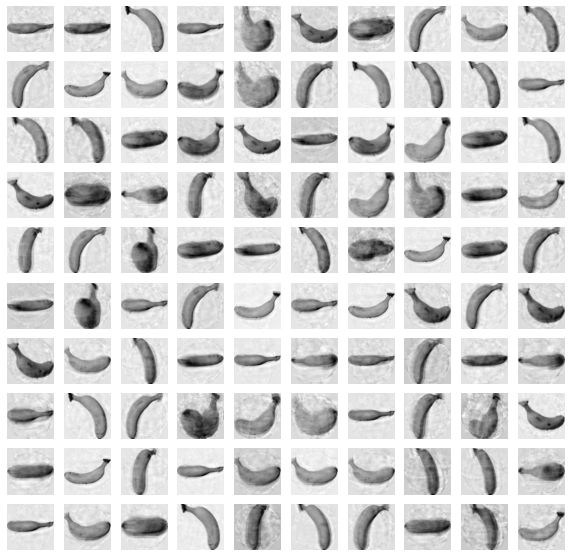

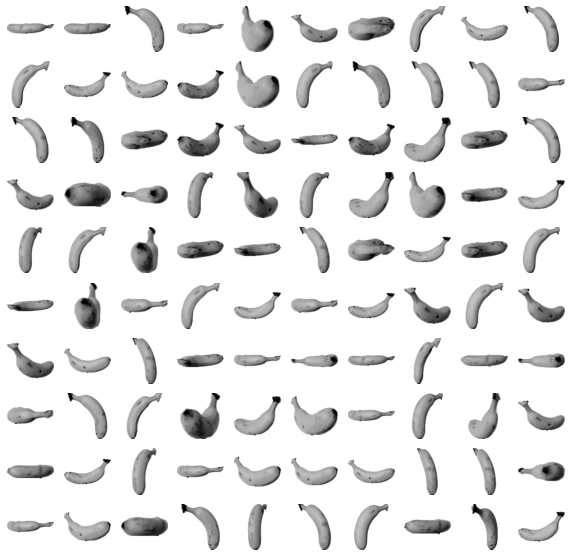

In [ ]:
# Transform reduced data back to original space
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# print reconstructed data images (apple, pineapple, banana)
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  draw_fruits(fruits[start:start+100]) # compare with original

In [7]:
# Print sum of variance ratios (if n_components=None, sum of ratios is 1.0)
print(np.sum(pca.explained_variance_ratio_))

0.9215974235164359


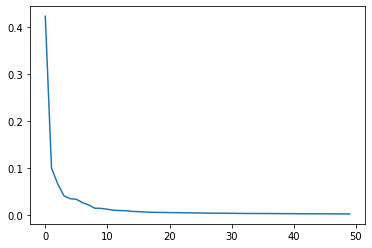

In [8]:
# Plot variance ratio(percentage)
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [9]:
# Variance Percentage as Parameter (0 < n_components < 1)
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

# Print num of principal components
print(pca.components_.shape)
print()

# Dimenstionality reduction
print(fruits_2d.shape)
print(fruits_pca.shape) # 10,000 to 50
fruits_pca_percentage = pca.transform(fruits_2d)
print(fruits_pca_percentage.shape) # 10,000 to 2

(2, 10000)

(300, 10000)
(300, 50)
(300, 2)


In [11]:
# Applying to LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Add target
target = np.array([0]*100 + [1]*100 + [2]*100)

# Cross validation
from sklearn.model_selection import cross_validate

# Compare cv score and fit_time
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

scores = cross_validate(lr, fruits_pca_percentage, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

0.9966666666666667 2.2707698345184326
1.0 0.03915143013000488
0.9933333333333334 0.043910646438598634


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


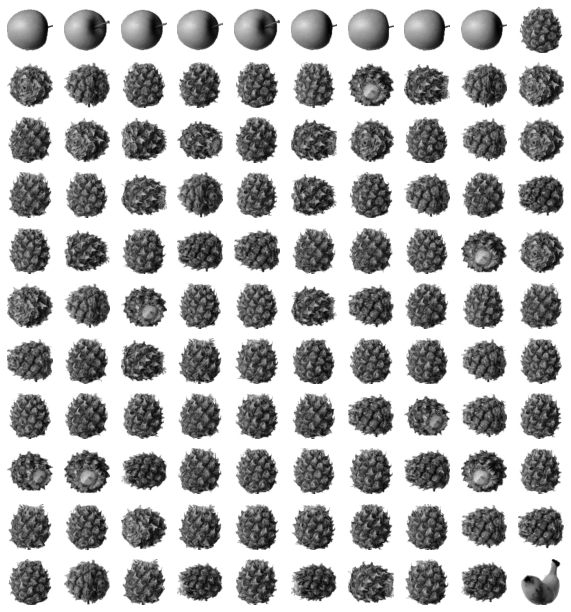

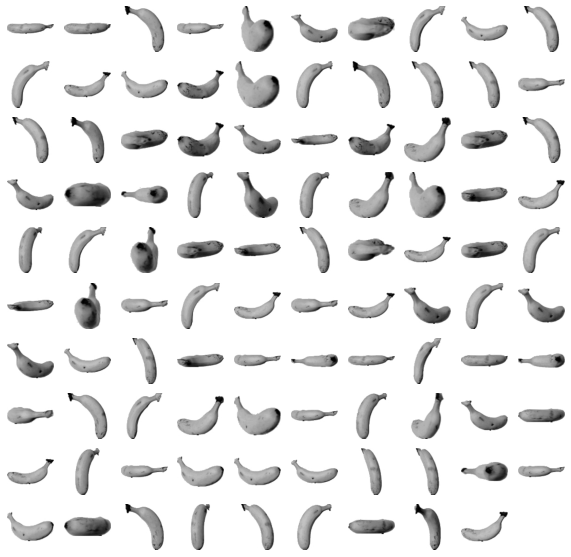

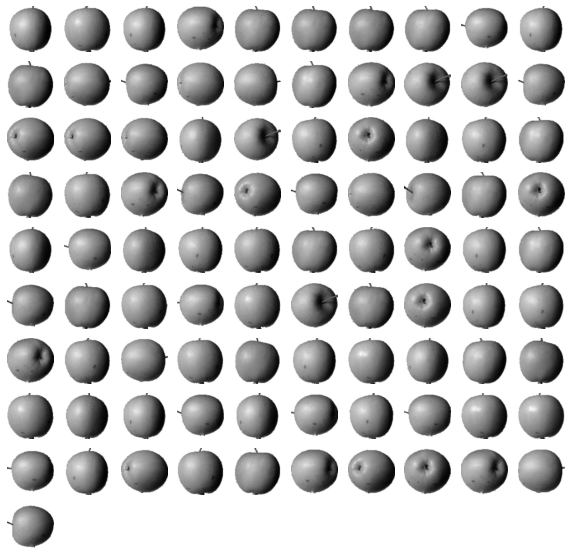

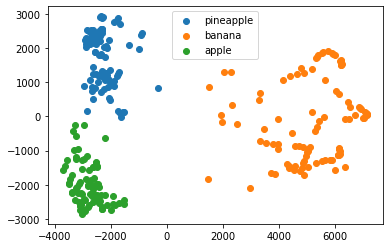

In [14]:
# Applying to KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_pca_percentage)

# number of samples for each cluster label
print(np.unique(km.labels_, return_counts=True))

# Draw images for each (found) cluster label
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])

# Plot scatter for each cluster label with 2 principal components (fruits_pca_percentage)
for label in range(0, 3):
  data = fruits_pca_percentage[km.labels_ == label] # shape=(300, 2)
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()